# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
#Antes de comenzar, importamos las librerias necesarias
import requests #esta librería permite enviar requests al código HTML y manejar las respuestas
import pandas as pd #esta librería permite crear y manipular dataframes

#Dado que está la tormenta Santa Rosa, un producto de interés es el paraguas
buscar = "Paraguas"

#A la hora de buscar, reemplazamos $SITE_ID por MLA, que es el sitio de Argentina.
#Además, reemplazamos ítem por "buscar" y los espacios por %20
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20")) 
print(url)

#Hacemos el request y guardamos la response en una variable
response = requests.request("GET", url)

#Vemos el texto que nos trae el request, que refiere a los productos que encontró
#response.text


https://api.mercadolibre.com/sites/MLA/search?q=Paraguas


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [2]:
#Para guardar los  precios de los ítems, creamos un diccionario (json) para luego crear un DataFrame.
data = response.json()
#data

In [4]:
#Para guardar el precio de los paraguas, hacemos un for loop para recorrer la clave de "results" del diccionario data,
# dentro de la cual se encuentra la información de los precios.
precios = [] #Primero inicializamos una lista vacía.

for item in data["results"]: #recorremos la clave "results" del diccionario data.
    precios.append({
        "nombre_del_item": item["title"],
        "precio": item["price"],
    }) #Agregamos a la lista "precios" el nombre del ítem y su precio correspondiente.

#precios

In [5]:
#Ahora creamos un DataFrame a partir de la lista de precios que creamos anteriormente.
paraguas_df = pd.DataFrame(precios)
paraguas_df.head()


,nombre_del_item,precio
0,Unicross 62.p5004 Paraguas Automático 21.5 Negro,16389.99
1,"Paraguas Corto Unicross 21,5 Pulgadas Abre Aut...",16990.00
2,Paraguas Transparente Vinilico Varios Colores ...,5943.79
3,Paraguas Automático Abre Cierra Corto Reforzad...,26640.00
4,Paraguas Reforzado Anti Viento Diseño Colores ...,11990.00


In [6]:
#Para calcular el precio promedio de los paraguas, utilizamos el método mean() de pandas.
average_price = paraguas_df['precio'].mean()
print("El precio promedio de los paraguas es $",average_price)

El precio promedio de los paraguas es $ 16656.2112


In [7]:
#Para calcular el precio máximo de los paraguas, utilizamos el método max() de pandas.	
max_price = paraguas_df['precio'].max()
print("El precio más alto de los paraguas es $",max_price)

El precio más alto de los paraguas es $ 47296.0


In [8]:
#Para calcular el precio mínimo de los paraguas, utilizamos el método min() de pandas.
min_price = paraguas_df['precio'].min()
print("El precio más bajo de los paraguas es $",min_price)

El precio más bajo de los paraguas es $ 5943.79


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

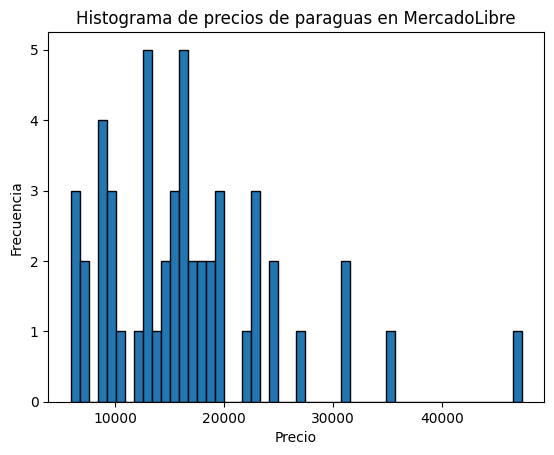

In [9]:
#Para hacer un histograma, importamos la librería matplotlib como plt
import matplotlib.pyplot as plt

#Creamos el histograma llamando la columna de precios del df, especificando la cantidad de bins y el color de los bordes
plt.hist(paraguas_df['precio'], bins=50, edgecolor='black')

#Agregamos el nombre de los ejes y el título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios de paraguas en MercadoLibre')

plt.show()

In [10]:
#A simple vista, pareciera ser que hay dos outliers, uno por encima de los $30000 y otro por encima de los $40000.
#Para confirmar esto, vamos a calcular los outliers.
#Calculate the z-scores for each price in the dataframe.
#Para calcular los z-scores, importamos la librería scipy.stats.
from scipy import stats

z_scores = stats.zscore(paraguas_df['precio']) #estandarizamos cada precio calculando el z score.
outliers = paraguas_df[abs(z_scores) > 3] #identificamos los outliers como aquellos cuyo z-score es mayor a 3.
outliers #finalmente nos damos cuenta de que el único outlier es el dato N° 41, cuyo precio es de $45000.

,nombre_del_item,precio
40,Paraguas Golf Premium Antiviento Automatic | T...,47296.0


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

Vamos a explorar la funcionalidad de búsqueda por categorías en Mercado Libre Argentina (MLA). De forma resumida, esta opción devuelve publicaciones que pertenecen a una categoría de publicación de Mercado Libre. Para más información se puede acceder al apartado de [Cateogrías y Atributos](https://developers.mercadolibre.com.ar/es_ar/categorias-y-atributos). 

In [11]:
buscar2 = "MLA1055" #Por ejemplo, vamos a buscar la categoría MLA1055, que corresponde a "Celulares".

#Hacemos el mismo procedimiento que realizamos arriba pero con el url correspondiente.
url2 = "https://api.mercadolibre.com/sites/{}/search?category={}".format("MLA", buscar2.replace(" ", "%20")) 
print(url2)
#Hacemos el request y obtenemos la response
response2 = requests.request("GET", url2)
#response2.text


https://api.mercadolibre.com/sites/MLA/search?category=MLA1055


In [12]:
#Guardamos la response en un diccionario json en la variable data2.
data2 = response2.json()
#data2

In [13]:
#El resultado que vamos a analizar es la comparación entre el precio original del producto y el precio actual. 
comparacion_precios = [] #Inicializamos una lista vacía para guardar los resultados de la comparación.

#Creamos un for loop que recorra la clave "results" del diccionario data2, que contiene la información de los precios.
for item in data2["results"]:
    precio_actual = item["price"] #guardamos el precio actual del ítem.
    precio_original = item['original_price'] #guardamos el precio original del ítem.
    
    #Comparamos todos los posibles casos.
    #Primero aseguremos que ambos precios no sean nulos y que el precio actual sea mayor al original.
    if precio_actual is not None and precio_original is not None and precio_actual > precio_original: 
        comparison = "mayor"
    #Luego aseguramos que ambos precios no sean nulos y que el precio actual sea menor al original.
    elif precio_actual is not None and precio_original is not None and precio_actual < precio_original:
        comparison = "menor"
    else:
        comparison = "igual"
    
    #Agregamos el nombre del ítem, su precio actual, el original y la comparación a la lista "comparacion_precios".
    comparacion_precios.append({
        "item": item["title"],
        "precio": precio_actual,
        "precio_original": precio_original,
        "comparacion": comparison
    })

#Lo convertimos en un df y lo mostramos
comparacion_precios_df = pd.DataFrame(comparacion_precios)
comparacion_precios_df.head()

,item,precio,precio_original,comparacion
0,Celular Alcatel 1 Ultra32 32/1gb Black,69999,79999.00,menor
1,Samsung Galaxy A15 128 Gb Negro Azulado 4 Gb Ram,329999,432061.54,menor
2,Tcl 40 Se 256 Gb Dark Gray 6 Gb Ram,279999,319999.00,menor
3,Samsung Galaxy A55 256gb Awesome Navy 8gb Ram,999999,1028719.38,menor
4,Moto G24 Power 128gb + 8gb Glacier Blue,429999,NaN,igual


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [1]:
#Primero importamos las librerías necesarias. 
import requests #enviar requests a código HTML y manejar las reponses.
from bs4 import BeautifulSoup #html parser, programa que analiza el código html.
import pandas as pd #Para manejar df.


In [2]:
url = "https://www.lanacion.com.ar/" #url de la página a scrapear

r = requests.get(url) #traigo el contenido del html
contenido = r.content #guardo el contenido en una variable

#contenido #muestro el contenido

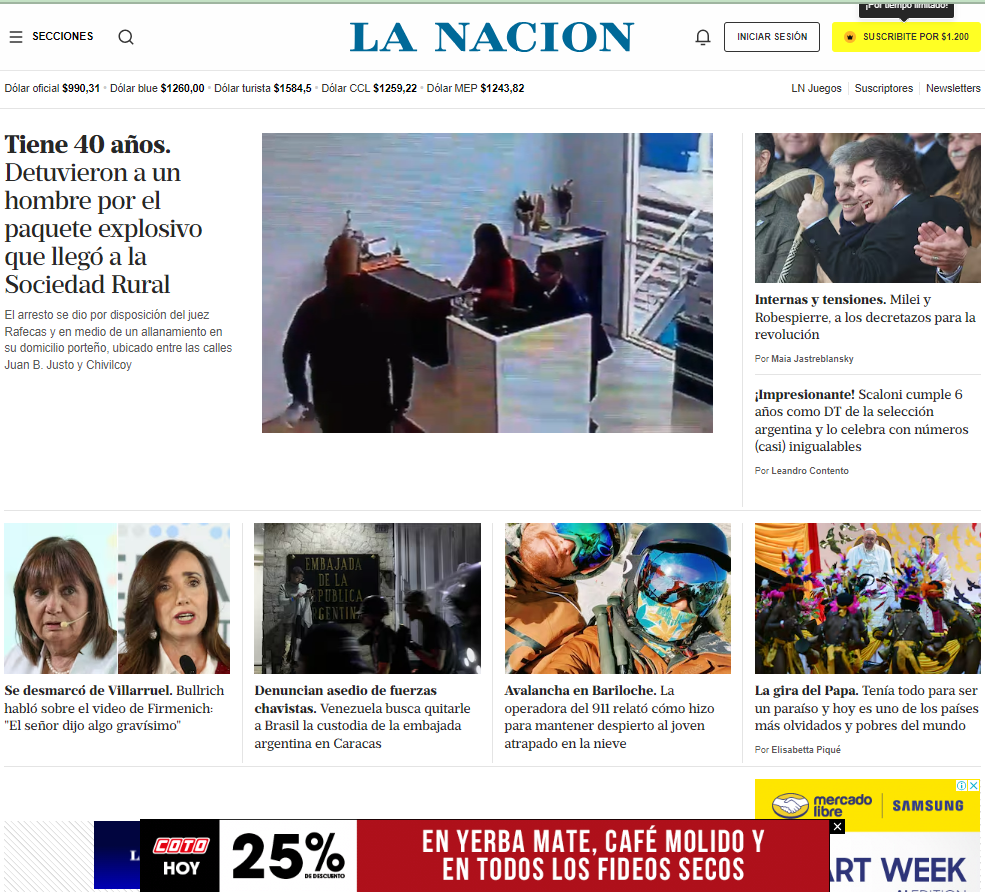

In [3]:
soup = BeautifulSoup(contenido, "html.parser") #parseo el contenido con BeautifulSoup
#soup

In [5]:
#Dentro de la sopa, el método "find_all" me permite buscar todos los elementos de la página con ese tag HTML y devuelve un objeto 
#de la clase "bs4.element.ResultSet". En este caso, como queremos buscar los links a las noticias de la página principal,
#buscamos los elementos "a" que tengan la clase "link ln-link flex flex-column --unstyled".
anchor_elements = soup.find_all('a', class_ = 'link ln-link flex flex-column --unstyled') 
#print('\n', anchor_elements)


In [6]:
#Tenemos que guardar estos links para armar el df. Para eso, inicializamos una lista vacía.
links = []
#Además, queremos guardar el dominio de la página para armar los links completos.
domain = "https://www.lanacion.com.ar/"

#Extraemos el texto de cada clave "href" del elemento <a>, le agregamos el dominio y lo guardamos en la lista "links".
for anchor_element in anchor_elements:
    anchor_text = domain + anchor_element['href']

    links.append({
        'links': anchor_text
        })

#links

In [8]:
#Creamos un dataframe a partir de la lista de títulos.
links_df = pd.DataFrame(links)
links_df.head()

,links
0,https://www.lanacion.com.ar//politica/detuvier...
1,https://www.lanacion.com.ar//politica/javier-m...
2,https://www.lanacion.com.ar//deportes/futbol/m...
3,https://www.lanacion.com.ar//politica/bullrich...
4,https://www.lanacion.com.ar//el-mundo/venezuel...


In [10]:
#Ahora que tenemos el df con los links, vamos a guardarlos en un archivo de excel.
#Para eso, primero necesitamos importar la librería openpyxl.
import openpyxl
#Finalmente, guardamos el df en un archivo de excel.
links_df.to_excel('links-Bernhadt_Laszeski_Luque.xlsx', index=False)